# Recommender System

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Introduction" role="tab" aria-controls="profile">Introduction<span class="badge badge-primary badge-pill"></span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Content-Based-Filtering" role="tab" aria-controls="messages">Content based filtering<span class="badge badge-primary badge-pill"></span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#Collaborative-Filtering" role="tab" aria-controls="settings">Collaborative filtering<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action"  data-toggle="list" href="#Hybrid-Recommender-System" role="tab" aria-controls="settings">Hybrid Recommender System<span class="badge badge-primary badge-pill"></span></a>    
    </div>

# Introduction

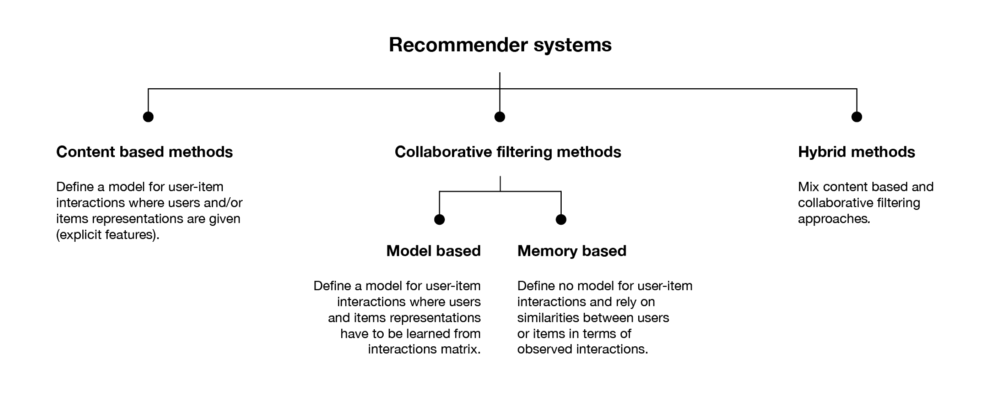

<div>
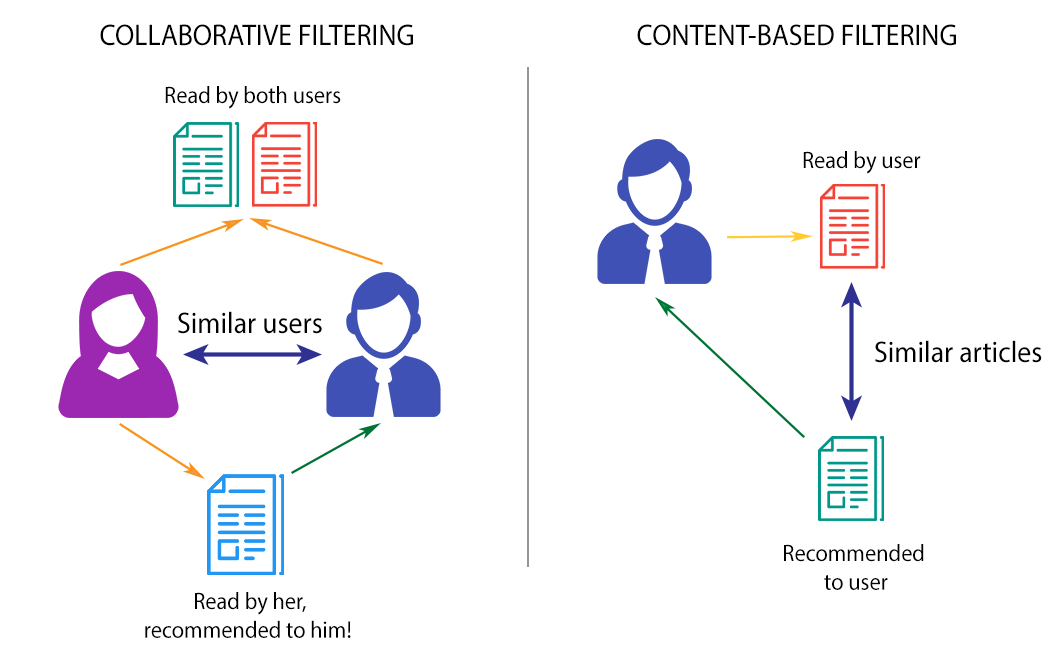
</div>

# Content-Based Filtering

* This type of filter does not involve other users if not ourselves. Based on what we like, the algorithm will simply pick items with similar content to recommend us.

* Cosine Similarity is one of the metric that we can use when calculating similarity, between users or contents.

* Content-based recommenders treat suggestions as a user-specific
category problem and learn a classifier for the customer's preferences depending on product traits. This approach is based on
information retrieval because content associated with the user’s preferences is treated as query to the system and unrated items
are scored with similar items

## Fashion Recommender System 

* To illustrate basic content based filtering on the basis of product description
* It uses cosine similarity to understand the likeness of different fashion garments

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 
df = pd.read_csv("fashion-data.csv")

The data contains 500 product type and we are trying to recommend top 10 similar product to the purchased item

In [2]:
df.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [3]:
#Word embedding using TF-IDF
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['description'])

In [4]:
#Calculating cosine similarities among all the available product
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix) 
results = {}
for idx, row in df.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:1]
    #print(similar_indices)
    similar_items = [(cosine_similarities[idx][i], df['id'][i]) for i in similar_indices] 
    results[row['id']] = similar_items[1:]

In [5]:
#Function to reverse map and recommend the items
def item(id):  
    return df.loc[df['id'] == id]['description'].tolist()[0].split(' - ')[0]

# Just reads the results out of the dictionary.def 
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")

In [6]:
#Recommendations
recommend(item_id=40, num=10)

Recommending 10 products similar to Fezzman shirt...
-------
Recommended: Traversing auguille d'entreves (score:0.0187570535671376)
Recommended: Going big in b.c. poster (score:0.018833693944229037)
Recommended: Surf brim (score:0.01887428023955814)
Recommended: Wild steelhead, alaska poster (score:0.018880358356743576)
Recommended: Flyfishing the athabasca poster (score:0.019003498956779136)
Recommended: Symmetry w16 poster (score:0.019048299828287412)
Recommended: Lead an examined life poster (score:0.019347722522867858)
Recommended: Beach bucket (score:0.019516558727964754)
Recommended: Ultra hw mountaineering socks (score:0.019928579689678955)
Recommended: Wyoming climbing poster (score:0.019929167637094222)


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Recommender-System" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

### Understanding Count Vectorizer and Cosine Similarity and Pearson Correlation 

In [7]:
text = ["London Paris London","Paris Paris London" , "Male Male Female", "Female Male Female"]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(text)

In [9]:
print(cv.get_feature_names())
print(count_matrix.toarray())

['female', 'london', 'male', 'paris']
[[0 2 0 1]
 [0 1 0 2]
 [1 0 2 0]
 [2 0 1 0]]


<div>
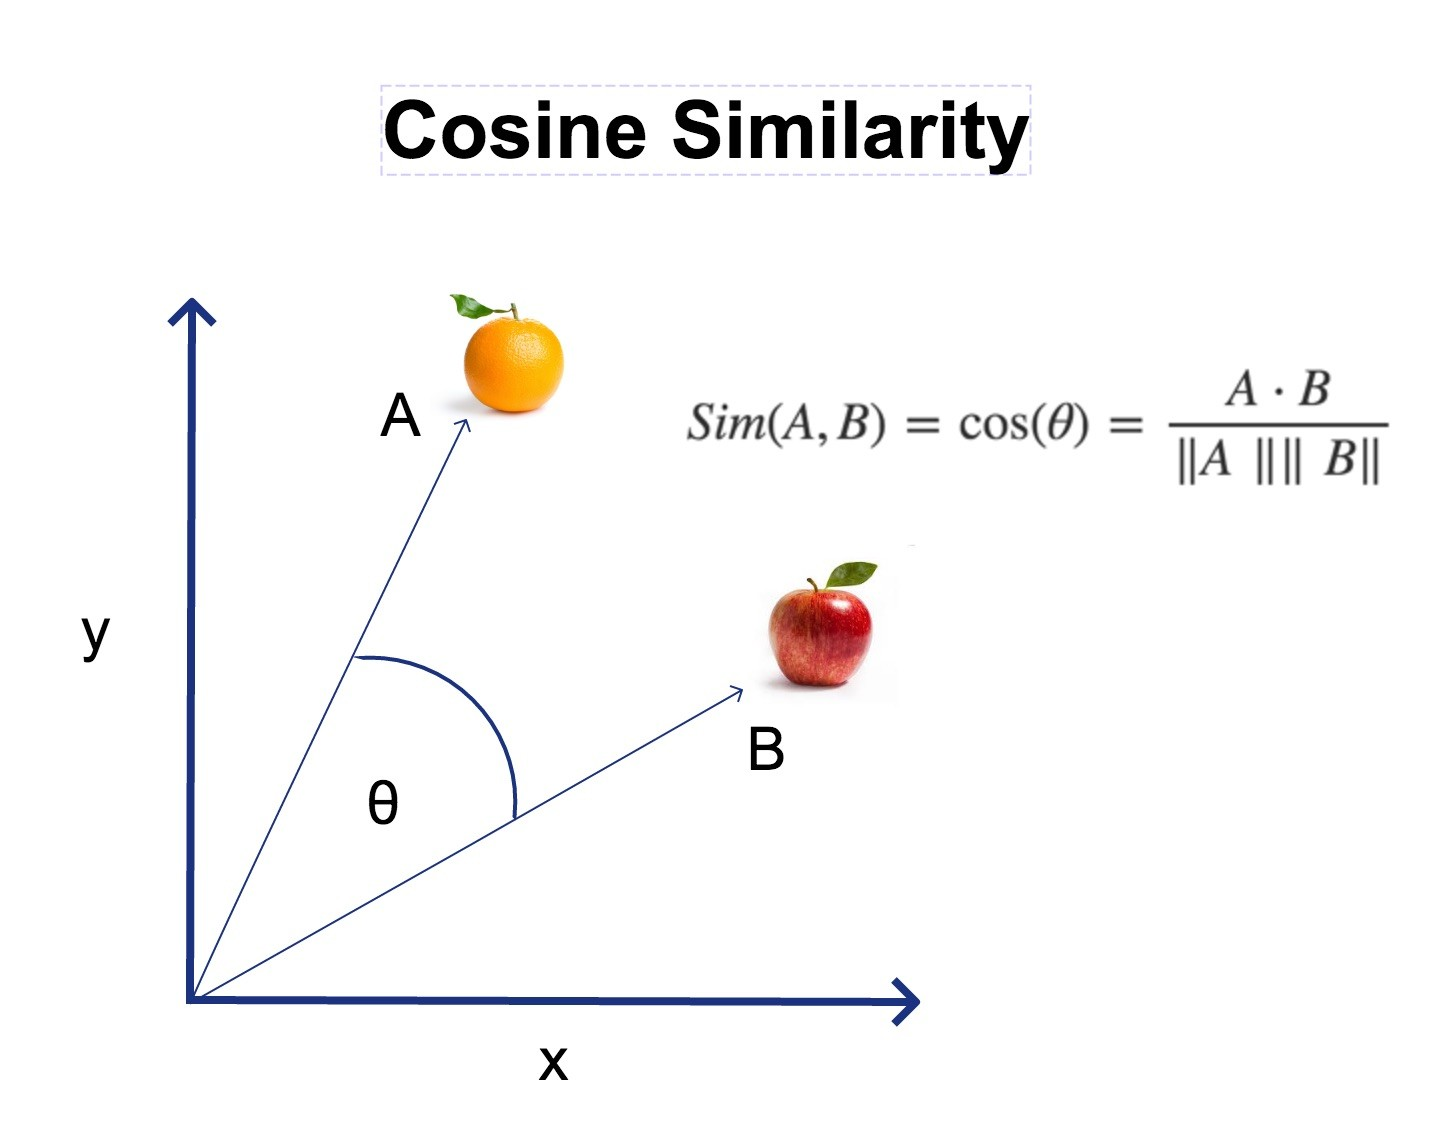
</div>

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(count_matrix)
print(similarity_scores)

[[1.  0.8 0.  0. ]
 [0.8 1.  0.  0. ]
 [0.  0.  1.  0.8]
 [0.  0.  0.8 1. ]]


In [11]:
#correlation
np.corrcoef(count_matrix.toarray())

array([[ 1.        ,  0.63636364, -0.81818182, -0.81818182],
       [ 0.63636364,  1.        , -0.81818182, -0.81818182],
       [-0.81818182, -0.81818182,  1.        ,  0.63636364],
       [-0.81818182, -0.81818182,  0.63636364,  1.        ]])

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Recommender-System" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Movie Recommender System

<div>
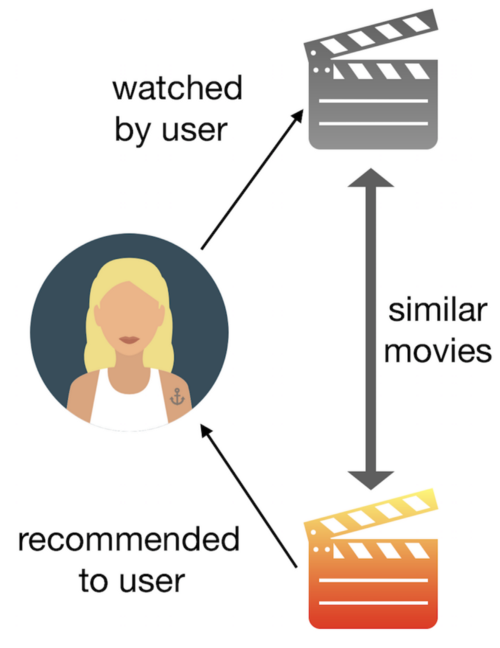
</div>

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,pairwise_distances

In [13]:
df = pd.read_csv("movie_dataset.csv")

In [14]:
df.shape

(4803, 24)

In [15]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


If you visualize the dataset, you will see that it has many extra info about a movie. We don’t need all of them. So, we choose keywords, cast, genres and director column to use as our feature set(the so called “content” of the movie).

In [16]:
features = ['keywords','cast','genres','director']

Our next task is to create a function for combining the values of these columns into a single string.

In [17]:
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

Now, we need to call this function over each row of our dataframe. But, before doing that, we need to clean and preprocess the data for our use. We will fill all the NaN values with blank string in the dataframe.

In [18]:
for feature in features:
    df[feature] = df[feature].fillna('') #filling all NaNs with blank string

df["combined_features"] = df.apply(combine_features,axis=1) 
#applying combined_features() method over each rows of dataframe and storing the combined string in "combined_features" column

In [19]:
df.iloc[0].combined_features

'culture clash future space war space colony society Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez Action Adventure Fantasy Science Fiction James Cameron'

In [20]:
cv = CountVectorizer() #creating new CountVectorizer() object
count_matrix = cv.fit_transform(df["combined_features"]) #feeding combined strings(movie contents) to CountVectorizer() object

At this point, 60% work is done. Now, we need to obtain the cosine similarity / pearson similarity matrix from the count matrix.

In [21]:
cosine_sim = cosine_similarity(count_matrix)

In [22]:
len(cosine_sim[0])

4803

In [23]:
pearson_sim = np.corrcoef(count_matrix.todense())

C:\Users\mohitkumar\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\mohitkumar\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [24]:
len(pearson_sim[0])

4803

In [25]:
cosine_sim[0]

array([1.        , 0.10540926, 0.12038585, ..., 0.        , 0.        ,
       0.        ])

In [26]:
pearson_sim[0]

array([ 1.        ,  0.10381994,  0.11901652, ..., -0.00162313,
       -0.0010406 , -0.00124536])

Now, we will define two helper functions to get movie title from movie index and vice-versa.

In [27]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

Our next step is to get the title of the movie that the user currently likes. Then we will find the index of that movie. After that, we will access the row corresponding to this movie in the similarity matrix. Thus, we will get the similarity scores of all other movies from the current movie. Then we will enumerate through all the similarity scores of that movie to make a tuple of movie index and similarity score. This will convert a row of similarity scores like this- [1 0.5 0.2 0.9] to this- [(0, 1) (1, 0.5) (2, 0.2) (3, 0.9)] . Here, each item is in this form- (movie index, similarity score).

In [28]:
movie_user_likes = "Arn: The Knight Templar"
movie_index = get_index_from_title(movie_user_likes)
similar_movies_with_cosine = list(enumerate(cosine_sim[movie_index])) 

In [29]:
movie_user_likes = "Arn: The Knight Templar"
movie_index = get_index_from_title(movie_user_likes)
similar_movies_with_pearson = list(enumerate(pearson_sim[movie_index])) 
#accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it

Now comes the most vital point. We will sort the list similar_movies according to similarity scores in descending order. Since the most similar movie to a given movie will be itself, we will discard the first element after sorting the movies.

In [30]:
sorted_similar_movies_with_cosine = sorted(similar_movies_with_cosine,key=lambda x:x[1],reverse=True)[1:]

In [31]:
sorted_similar_movies_with_pearson = sorted(similar_movies_with_pearson,key=lambda x:x[1],reverse=True)[1:]

Now, we will run a loop to print first 11 entries from sorted_similar_movies_with_cosine list.

In [33]:
i=0
print("Top 11 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies_with_cosine:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>11:
        break

Top 11 similar movies to Arn: The Knight Templar are:

Caravans
Undisputed
Me You and Five Bucks
Amidst the Devil's Wings
Love's Abiding Joy
Restless
Pirates of the Caribbean: Dead Man's Chest
Thor
The Claim
The Twilight Saga: Breaking Dawn - Part 2
Battleship
Cinderella


Now, we will run a loop to print first 11 entries from sorted_similar_movies_with_pearson list.

In [34]:
i=0
print("Top 11 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies_with_pearson:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>11:
        break

Top 11 similar movies to Arn: The Knight Templar are:

Caravans
Undisputed
Me You and Five Bucks
Love's Abiding Joy
Restless
Pirates of the Caribbean: Dead Man's Chest
Thor
The Claim
The Twilight Saga: Breaking Dawn - Part 2
Battleship
Ronin
Cinderella


Different similarity measure algorithms can be used i.e. Pearson correlation, Euclidean distance, Cosine similarity and
Jaccard coefficient. The algorithms used behave differently in different context. Majority of the algorithms shows
the same result in finding the similarity between the item contents. The resulting values are scaled in the range of 0 to 1 for Euclidean distance, Cosine similarity and Jaccard coefficient, whereas the values for Pearson correlation are from -1 to 1. Value 1 in all the four algorithms represent completely similar and value 0 represents completely dissimilar. Value -1 in Pearson correlation represents the negative similarity between the entities.

##### In the above example we can observe that most of the recommendations are same for cosine and pearson similarity metrics except for few such as "Ronin" and "Amidst the Devil's Wings".

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Recommender-System" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Conclusion

Further accuracy and performance can be enhanced by applying pre-processing methods for the combined features to bring them on same scale and remove noise and unwanted data. 
For eg:
* Converting combined features to lowercase
* Removing stopword
* Applying methods like lemmatization/stemming
* Remove extra whitespaces

# Collaborative Filtering

* Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.
* It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

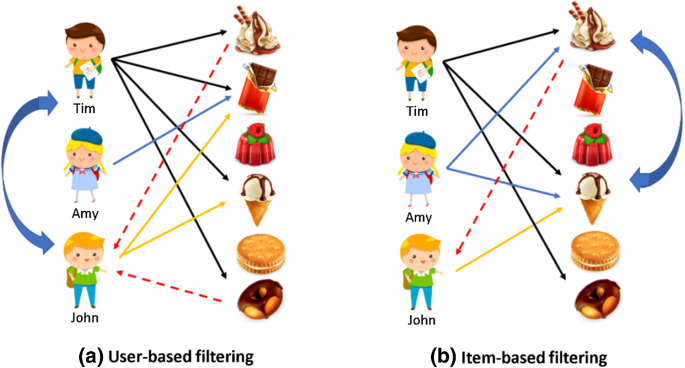

## KNN on movie lens dataset (Item-Item based filtering)

* To implement an item based collaborative filtering, KNN is a perfect go-to model and also a very good baseline for recommender system development.
* KNN is a non-parametric, lazy learning method. It uses a database in which the data points are separated into several clusters to make inference for new samples.
* KNN does not make any assumptions on the underlying data distribution but it relies on item feature similarity.
* KNN’s performance will suffer from curse of dimensionality if it uses “euclidean distance” in its objective function. Euclidean distance is unhelpful in high dimensions because all vectors are almost equidistant to the search query vector (target movie’s features). Instead, we will use cosine similarity for nearest neighbor search.

In [2]:
import os
import pandas as pd
from sklearn.neighbors import NearestNeighbors
data_path = 'ml-25m/'
movies_filename = 'movies.csv'
ratings_filename = 'ratings.csv'
df_movies = pd.read_csv(
    os.path.join(data_path, movies_filename),
usecols=['movieId', 'title'],
    dtype={'movieId': 'int32', 'title': 'str'})
df_ratings = pd.read_csv(
    os.path.join(data_path, ratings_filename),
    usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [36]:
from scipy.sparse import csr_matrix
# pivot ratings into movie features
df_ratings=df_ratings[:6250024]
df_movie_features = df_ratings.pivot(
    index='movieId',
    columns='userId',
    values='rating'
).fillna(0)
mat_movie_features = csr_matrix(df_movie_features.values)

In [37]:
mat_movie_features

<41883x40510 sparse matrix of type '<class 'numpy.float32'>'
	with 6250024 stored elements in Compressed Sparse Row format>

In [38]:
df_movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,40501,40502,40503,40504,40505,40506,40507,40508,40509,40510
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.5,4.0,3.0,4.0,0.0,0.0,4.0,0.0,3.5,...,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,4.0,1.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
num_users = len(df_ratings.userId.unique())
num_items = len(df_ratings.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 40510 unique users and 41883 unique movies in this data set


In [40]:
# get count
df_ratings_cnt_tmp = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp

,count
rating,
0.5,96334
1.0,196353
1.5,102872
2.0,411018
2.5,319901
3.0,1220327
3.5,801904
4.0,1651701
4.5,550918


In [41]:
# there are a lot more counts in rating of zero
total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - df_ratings.shape[0]

df_ratings_cnt = df_ratings_cnt_tmp.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_cnt

,count
0.0,1690430306
0.5,96334
1.0,196353
1.5,102872
2.0,411018
2.5,319901
3.0,1220327
3.5,801904
4.0,1651701
4.5,550918


In [42]:
#log normalise to make it easier to interpret on a graph
import numpy as np
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
df_ratings_cnt

,count,log_count
0.0,1690430306,21.248249
0.5,96334,11.475577
1.0,196353,12.187669
1.5,102872,11.541241
2.0,411018,12.926392
2.5,319901,12.675767
3.0,1220327,14.014629
3.5,801904,13.594744
4.0,1651701,14.317316
4.5,550918,13.219341


In [43]:
# get rating frequency
#number of ratings each movie got.
df_movies_cnt = pd.DataFrame(df_ratings.groupby('movieId').size(), columns=['count'])
df_movies_cnt.head()

,count
movieId,
1,14284
2,5983
3,2902
4,628
5,2931


In [44]:
#now we need to take only movies that have been rated atleast 50 times to get some idea of the reactions of users towards it
popularity_thres = 50
popular_movies = list(set(df_movies_cnt.query('count >=@popularity_thres').index))
df_ratings_drop_movies = df_ratings[df_ratings.movieId.isin(popular_movies)]
print('shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies.shape)

shape of original ratings data:  (6250024, 3)
shape of ratings data after dropping unpopular movies:  (6025798, 3)


In [45]:
# get number of ratings given by every user
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
df_users_cnt.head()

,count
userId,
1,62
2,183
3,652
4,238
5,101


In [46]:
# filter data to come to an approximation of user likings.
ratings_thres = 50
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(active_users)]
print('shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)

shape of original ratings data:  (6250024, 3)
shape of ratings data after dropping both unpopular movies and inactive users:  (5551213, 3)


In [47]:
# pivot and create movie-user matrix
movie_user_mat = df_ratings_drop_users.pivot(index='movieId', columns='userId', values='rating').fillna(0)
#map movie titles to images
movie_to_idx = {
    movie: i for i, movie in 
    enumerate(list(df_movies.set_index('movieId').loc[movie_user_mat.index].title))
}
# transform matrix to scipy sparse matrix
movie_user_mat_sparse = csr_matrix(movie_user_mat.values)

In [48]:
movie_user_mat_sparse

<8076x25362 sparse matrix of type '<class 'numpy.float32'>'
	with 5551213 stored elements in Compressed Sparse Row format>

In [49]:
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fit
#model_knn.fit(movie_user_mat_sparse)

In [50]:
from fuzzywuzzy import fuzz
def fuzzy_matching(mapper, fav_movie, verbose=True):
    """
    return the closest match via fuzzy ratio. 
    
    Parameters
    ----------    
    mapper: dict, map movie title name to index of the movie in data
    fav_movie: str, name of user input movie
    verbose: bool, print log if True
    Return
    ------
    index of the closest match
    """
    
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

C:\Users\mohitkumar\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [51]:
def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    """
    return top n similar movie recommendations based on user's input movie


    Parameters
    ----------
    model_knn: sklearn model, knn model
    data: movie-user matrix
    mapper: dict, map movie title name to index of the movie in data
    fav_movie: str, name of user input movie
    n_recommendations: int, top n recommendations
    Return
    ------
    list of top n similar movie recommendations
    """
    
    # fit
    model_knn.fit(data)
    # get input movie index
    print('You have input movie:', fav_movie)
    idx = fuzzy_matching(mapper, fav_movie, verbose=True)
    
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [52]:
my_favorite = 'Justice League'

make_recommendation(
    model_knn=model_knn,
    data=movie_user_mat_sparse,
    fav_movie=my_favorite,
    mapper=movie_to_idx,
    n_recommendations=10)

You have input movie: Justice League
Found possible matches in our database: ['Justice League (2017)']

Recommendation system start to make inference
......

Recommendations for Justice League:
1: Venom (2018), with distance of 0.5993596315383911
2: Suicide Squad (2016), with distance of 0.5991568565368652
3: Captain Marvel (2018), with distance of 0.5978403091430664
4: Untitled Spider-Man Reboot (2017), with distance of 0.585890531539917
5: Ant-Man and the Wasp (2018), with distance of 0.583364725112915
6: Black Panther (2017), with distance of 0.5739504098892212
7: Aquaman (2018), with distance of 0.5706990957260132
8: Wonder Woman (2017), with distance of 0.560198187828064
9: Star Wars: The Last Jedi (2017), with distance of 0.558818519115448
10: Batman v Superman: Dawn of Justice (2016), with distance of 0.5285896062850952


We can effectively identify there are two shortcomings in item based collaborative filtering:
* popularity bias: recommender is prone to recommender popular items
* item cold-start problem: recommender fails to recommend new or less-known items because items have either none or very little interactions

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Recommender-System" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## SVD on movie lens dataset (User-User based filtering)

* Matrix factorization can be used to discover features underlying the interactions between two different kinds of entities.
* One advantage of employing matrix factorization for recommender systems is the fact that it can incorporate implicit feedback—information that’s not directly given but can be derived by analyzing user behavior—such as items frequently bought or viewed.
* Using this capability we can estimate if a user is going to like a movie that they never saw. And if that estimated rating is high, we can recommend that movie to the user, so as to provide a more personalized experience.
* SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N). In the context of the recommender system, the SVD is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user, and each column represents an item. The elements of this matrix are the ratings that are given to items by users.

Step 1. Load the Data into Pandas Dataframe

In [53]:
import pandas as pd
import numpy as np
import os
data_path = 'ml-25m/'
movies_filename = 'movies.csv'
ratings_filename = 'ratings.csv'

df_movies = pd.read_csv(
    os.path.join(data_path, movies_filename),
#     movies_filename,
    usecols=['movieId', 'title'],
    dtype={'movieId': 'int32', 'title': 'str'})

df_ratings = pd.read_csv(
    os.path.join(data_path, ratings_filename),
#     ratings_filename,
    usecols=['userId', 'movieId', 'rating'],
    
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

We pivot the dataframe to have userId as rows and movieId as columns, filling the null values with 0.0.

In [54]:
df_ratings=df_ratings[:3125012]
df_movie_features = df_ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

In [55]:
R = df_movie_features.values
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

Here, we will be using the scipy library in Python to implement SVD.

In [56]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)
# that the Sigma$ returned is just the values instead of a diagonal matrix. 
# This is useful, but since I'm going to leverage matrix multiplication to get predictions 
# I'll convert it to the diagonal matrix form.
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [57]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_movie_features.columns)
preds_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,208791,208793,208795,208800,208939,209049,209053,209055,209103,209163
0,0.737401,0.004221,-0.047771,-0.040918,-0.027591,-0.308165,-0.003310,-0.027573,-0.012109,0.122300,...,0.001757,-0.004602,-0.001823,-0.003284,-0.002494,-0.000516,-0.003018,-0.003018,-0.001044,0.001097
1,4.187437,0.494850,0.070980,-0.008444,-0.117596,0.379037,0.100695,0.093709,-0.112567,0.474100,...,-0.002033,-0.002635,0.006150,0.001208,-0.010914,0.001051,-0.002895,-0.002895,-0.008633,0.000661
2,1.587274,0.591198,-0.307573,-0.097345,-0.032214,0.708733,0.186531,-0.141126,-0.106800,-0.524378,...,-0.010914,-0.013666,-0.023079,-0.007592,-0.001193,-0.001763,-0.015496,-0.015496,-0.005212,-0.011583
3,2.562247,0.290040,-0.118626,-0.030613,-0.076762,0.152793,0.067345,-0.026693,-0.003602,0.301227,...,-0.004437,-0.007541,-0.003240,-0.000544,-0.006979,-0.002707,-0.003732,-0.003732,-0.009087,0.000631
4,4.443969,0.982385,1.359526,0.135161,1.137983,1.721156,1.118443,0.072305,0.504911,1.218184,...,-0.001786,-0.000672,-0.001863,-0.002384,-0.006494,0.000157,-0.000126,-0.000126,-0.000736,0.000396


Here, we just make a function that uses our factorized matrices to recommend movies to a user, given a user_id.

In [58]:
def recommend_movies(preds_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1
#     print(preds_df.iloc[user_row_number])
#     print(sorted_user_predictions)
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )
#     print(user_full)
#     print 'User {0} has already rated {1} movies.'.format(userID, user_full.shape[0])
#     print 'Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations)
    #                left_on = 'movieId',
#                right_on = 'movieId').
# merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left').rename(columns = {user_row_number: 'Predictions'}).
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['movieId'].isin(user_full['movieId'])]).merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left', left_on = 'movieId',
               right_on = 'movieId').rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :-1]
                      

    return user_full, recommendations

In [59]:
already_rated, predictions = recommend_movies(preds_df, 3, df_movies, df_ratings, 10)

In [60]:
already_rated.head(10)

,userId,movieId,rating,title
628,3,136449,5.0,Ghost in the Shell 2.0 (2008)
20,3,745,5.0,Wallace & Gromit: A Close Shave (1995)
479,3,81591,5.0,Black Swan (2010)
23,3,858,5.0,"Godfather, The (1972)"
26,3,924,5.0,2001: A Space Odyssey (1968)
350,3,48516,5.0,"Departed, The (2006)"
29,3,1148,5.0,Wallace & Gromit: The Wrong Trousers (1993)
289,3,27728,5.0,Ghost in the Shell 2: Innocence (a.k.a. Innoce...
37,3,1213,5.0,Goodfellas (1990)
290,3,27773,5.0,Old Boy (2003)


In [61]:
predictions

,movieId,title
24453,122904,Deadpool (2016)
6879,7254,The Butterfly Effect (2004)
7655,8636,Spider-Man 2 (2004)
4744,5010,Black Hawk Down (2001)
1134,1193,One Flew Over the Cuckoo's Nest (1975)
581,608,Fargo (1996)
4129,4370,A.I. Artificial Intelligence (2001)
23140,119145,Kingsman: The Secret Service (2015)
4038,4270,"Mummy Returns, The (2001)"
7974,8972,National Treasure (2004)


One typical problem caused by the data sparsity is the cold start problem. As collaborative filtering methods recommend items based on users’ past preferences, new users will need to rate a sufficient number of items to enable the system to capture their preferences accurately, and thus provides reliable recommendations.

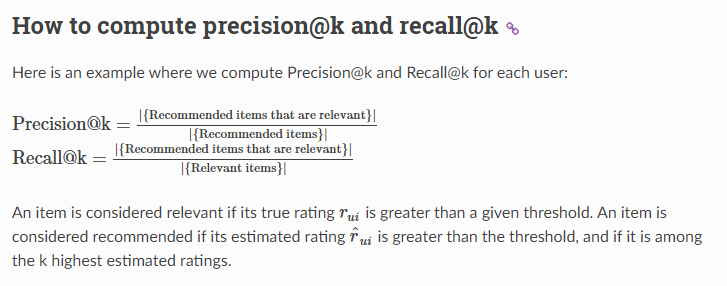

#### Precision = the number of items that I liked that were also recommended to me/ the number of items that were recommended
 

#### Recall = the number of items that I liked that were also recommended to me/ the number of items I liked

Reference: https://surprise.readthedocs.io/en/latest/FAQ.html#how-to-compute-precision-k-and-recall-k

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Recommender-System" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Hybrid Recommender System

**Hybrid recommender system** is the one that combines multiple
recommendation techniques together to produce the output. If one compares hybrid
recommender systems with collaborative or content-based systems, the recommendation
accuracy is usually higher in hybrid systems. The reason is the lack of information about the
domain dependencies in collaborative filtering, and about the people’s preferences in
content-based system. The combination of both leads to common knowledge increase, which
contributes to better recommendations. The knowledge increase makes it especially
promising to explore new ways to extend underlying collaborative filtering algorithms with
content data and content-based algorithms with the user behavior data.


**Step 1** Importing the required libraries

In [ ]:
from lightfm import LightFM
from sklearn.metrics.pairwise import cosine_similarity

**Step 2** Define the required functions for creating a recommender system

Helper functions to build recommender systems using Matrix factorization using LightFM package.

In [20]:
def create_interaction_matrix(df,user_col, item_col, rating_col, norm= False, threshold = None):
    '''
    Function to create an interaction matrix dataframe from transactional type interactions
    Required Input -
        - df = Pandas DataFrame containing user-item interactions
        - user_col = column name containing user's identifier
        - item_col = column name containing item's identifier
        - rating col = column name containing user feedback on interaction with a given item
        - norm (optional) = True if a normalization of ratings is needed
        - threshold (required if norm = True) = value above which the rating is favorable
    Expected output - 
        - Pandas dataframe with user-item interactions ready to be fed in a recommendation algorithm
    '''
    interactions = df.groupby([user_col, item_col])[rating_col] \
            .sum().unstack().reset_index(). \
            fillna(0).set_index(user_col)
    if norm:
        interactions = interactions.applymap(lambda x: 1 if x > threshold else 0)
    return interactions

In [21]:
def create_user_dict(interactions):
    '''
    Function to create a user dictionary based on their index and number in interaction dataset
    Required Input - 
        interactions - dataset create by create_interaction_matrix
    Expected Output -
        user_dict - Dictionary type output containing interaction_index as key and user_id as value
    '''
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict

In [22]:
def create_item_dict(df,id_col,name_col):
    '''
    Function to create an item dictionary based on their item_id and item name
    Required Input - 
        - df = Pandas dataframe with Item information
        - id_col = Column name containing unique identifier for an item
        - name_col = Column name containing name of the item
    Expected Output -
        item_dict = Dictionary type output containing item_id as key and item_name as value
    '''
    item_dict ={}
    for i in range(df.shape[0]):
        item_dict[(df.loc[i,id_col])] = df.loc[i,name_col]
    return item_dict

In [23]:
def runMF(interactions, n_components=30, loss='warp', k=15, epoch=30,n_jobs = 4):
    '''
    Function to run matrix-factorization algorithm
    Required Input -
        - interactions = dataset create by create_interaction_matrix
        - n_components = number of embeddings you want to create to define Item and user
        - loss = loss function other options are logistic, brp
        - epoch = number of epochs to run 
        - n_jobs = number of cores used for execution 
    Expected Output  -
        Model - Trained model
    '''
    x = sparse.csr_matrix(interactions.values)
    model = LightFM(no_components= n_components, loss=loss,k=k)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    return model

In [24]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 10, show = True):
    '''
    Function to produce user recommendations
    Required Input - 
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
        - user_id = user ID for which we need to generate recommendation
        - user_dict = Dictionary type input containing interaction_index as key and user_id as value
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - threshold = value above which the rating is favorable in new interaction matrix
        - nrec_items = Number of output recommendation needed
    Expected Output - 
        - Prints list of items the given user has already bought
        - Prints list of N recommended items  which user hopefully will be interested in
    '''
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index) \
                                 .sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter+=1
    return return_score_list
    

In [25]:
def sample_recommendation_item(model,interactions,item_id,user_dict,item_dict,number_of_user):
    '''
    Funnction to produce a list of top N interested users for a given item
    Required Input -
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
        - item_id = item ID for which we need to generate recommended users
        - user_dict =  Dictionary type input containing interaction_index as key and user_id as value
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - number_of_user = Number of users needed as an output
    Expected Output -
        - user_list = List of recommended users 
    '''
    n_users, n_items = interactions.shape
    x = np.array(interactions.columns)
    scores = pd.Series(model.predict(np.arange(n_users), np.repeat(x.searchsorted(item_id),n_users)))
    user_list = list(interactions.index[scores.sort_values(ascending=False).head(number_of_user).index])
    return user_list 

In [26]:
def create_item_emdedding_distance_matrix(model,interactions):
    '''
    Function to create item-item distance embedding matrix
    Required Input -
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
    Expected Output -
        - item_emdedding_distance_matrix = Pandas dataframe containing cosine distance matrix b/w items
    '''
    df_item_norm_sparse = sparse.csr_matrix(model.item_embeddings)
    similarities = cosine_similarity(df_item_norm_sparse)
    item_emdedding_distance_matrix = pd.DataFrame(similarities)
    item_emdedding_distance_matrix.columns = interactions.columns
    item_emdedding_distance_matrix.index = interactions.columns
    return item_emdedding_distance_matrix

In [27]:
def item_item_recommendation(item_emdedding_distance_matrix, item_id, 
                             item_dict, n_items = 10, show = True):
    '''
    Function to create item-item recommendation
    Required Input - 
        - item_emdedding_distance_matrix = Pandas dataframe containing cosine distance matrix b/w items
        - item_id  = item ID for which we need to generate recommended items
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - n_items = Number of items needed as an output
    Expected Output -
        - recommended_items = List of recommended items
    '''
    recommended_items = list(pd.Series(item_emdedding_distance_matrix.loc[item_id,:]. \
                                  sort_values(ascending = False).head(n_items+1). \
                                  index[1:n_items+1]))
    if show == True:
        print("Item of interest :{0}".format(item_dict[item_id]))
        print("Item similar to the above item:")
        counter = 1
        for i in recommended_items:
            print(str(counter) + '- ' +  item_dict[i])
            counter+=1
    return recommended_items

**Step 4** Loading the data

In [ ]:
data_path = 'ml-25m/'
movies_filename = 'movies.csv'
ratings_filename = 'ratings.csv'
df_movies = pd.read_csv(
    os.path.join(data_path, movies_filename),
usecols=['movieId', 'title'],
    dtype={'movieId': 'int32', 'title': 'str'})
df_ratings = pd.read_csv(
    os.path.join(data_path, ratings_filename),
    usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

**Step 5** Create interaction matrix

In [5]:
df_ratings=df_ratings[:3125012] ##Size is reduced to fit the data in memory
interactions = create_interaction_matrix(df = df_ratings,
                                         user_col = 'userId',
                                         item_col = 'movieId',
                                         rating_col = 'rating',
                                         threshold = '3')
interactions.shape

(20593, 32146)

In [6]:
interactions.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,208791,208793,208795,208800,208939,209049,209053,209055,209103,209163
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Step 6** Create User Dict

In [7]:
user_dict = create_user_dict(interactions=interactions)

**Step 7** Create Item dict

In [9]:
movies_dict = create_item_dict(df = df_movies,
                               id_col = 'movieId',
                               name_col = 'title')

**Step 8** Building Matrix Factorization model

In [16]:
mf_model = runMF(interactions = interactions,
                 n_components = 30,
                 loss = 'warp',
                 k = 15,
                 epoch = 30,
                 n_jobs = 4)

**Step 9** User Recommender

In [18]:
rec_list = sample_recommendation_user(model = mf_model, 
                                      interactions = interactions, 
                                      user_id = 11, 
                                      user_dict = user_dict,
                                      item_dict = movies_dict, 
                                      threshold = 4,
                                      nrec_items = 10)

Known Likes:
1- Simpsons Movie, The (2007)
2- Silence of the Lambs, The (1991)
3- Reality Bites (1994)

 Recommended Items:
1- Shrek (2001)
2- Fight Club (1999)
3- American Beauty (1999)
4- Forrest Gump (1994)
5- Lord of the Rings: The Fellowship of the Ring, The (2001)
6- American Pie (1999)
7- Finding Nemo (2003)
8- Monsters, Inc. (2001)
9- Sixth Sense, The (1999)
10- Shawshank Redemption, The (1994)


**Step 10** Item - User Recommender

In [35]:
#list of top N interested users for a given item
sample_recommendation_item(model = mf_model,
                           interactions = interactions,
                           item_id = 1,
                           user_dict = user_dict,
                           item_dict = movies_dict,
                           number_of_user = 15)

[111,
 1135,
 15441,
 16754,
 15578,
 15968,
 6092,
 4846,
 19035,
 15380,
 1144,
 10073,
 19592,
 3094,
 3920]

**Step 11**  Item - Item Recommender

In [29]:
item_item_dist = create_item_emdedding_distance_matrix(model = mf_model,
                                                       interactions = interactions)

In [34]:
rec_list = item_item_recommendation(item_emdedding_distance_matrix = item_item_dist,
                                    item_id = 695,
                                    item_dict = movies_dict,
                                    n_items = 10)

Item of interest :True Crime (1996)
Item similar to the above item:
1- Guilty as Sin (1993)
2- Playing God (1997)
3- Switchback (1997)
4- Extreme Measures (1996)
5- Night Falls on Manhattan (1996)
6- Palmetto (1998)
7- Newton Boys, The (1998)
8- Mortal Thoughts (1991)
9- Truth or Consequences, N.M. (1997)
10- Flesh and Bone (1993)


**Hybrid filtering technique** combines different recommendation techniques in order to gain better system optimization to avoid some limitations and problems of pure recommendation systems. The idea behind hybrid techniques is that a combination of algorithms will provide more accurate and effective recommendations than a single algorithm as the disadvantages of one algorithm can be overcome by another algorithm. Using multiple recommendation techniques can suppress the weaknesses of an individual technique in a combined model. The combination of approaches can be done in any of the following ways: separate implementation of algorithms and combining the result, utilizing some content-based filtering in collaborative approach, utilizing some collaborative filtering in content-based approach, creating a unified recommendation system that brings together both approaches.

**REFERENCE:** https://www.sciencedirect.com/science/article/pii/S1110866515000341

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Recommender-System" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>